In [1]:
import pandas as pd
import numpy as np


In [4]:
data=pd.read_excel('HR_file.xlsx')

this is data about HR to retention of employers 

Goal:
HR ingin membuat program retensi karyawan.

Task:
Analisis, hipotesis, dan pembuatan cerita data terkait alasan karyawan meninggalkan perusahaan (churn).


Data:
Sekitar 15.000 catatan karyawan.
Questions from Management:

1Apa penyebab utama turnover?

2Apakah ada hal yang mengejutkan dalam data?

3Segmen mana yang harus kita fokuskan?

4Departemen mana yang memiliki turnover tertinggi?

5Apakah kita perlu meningkatkan X atau menurunkan X?

6Di mana kita harus menerapkan program pilot?

In [5]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
data.shape

(14999, 10)

In [7]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


from this data we can know the insight, causing of employ left its small, mean can measure 0.23%.

mean of satisfaction level in 60% maybe this condition happened cause strict evaluate--> can we know the data last evaluation mean is 0.71, this number rather than far to 1.

this data also given to us story about how many project that give the emplyers, employers can get minim 3-4 data, even they can got project to 7 project. and maybe this can be causing why the employe can get churn, and 1 problems is promotion position just 2%, maybe there are many employers think, if they continoue to this company they can growth to expectation of career.

In [12]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [15]:
# Dropping duplicate rows from the dataset
data_cleaned=data.drop_duplicates()

# Checking if any duplicates were removed by comparing the shape of the original and cleaned data
original_shape = data.shape
cleaned_shape = data_cleaned.shape

original_shape, cleaned_shape


((14999, 10), (11991, 10))

# Visualisasi Histogram and BoxPlot untuk setiap feature

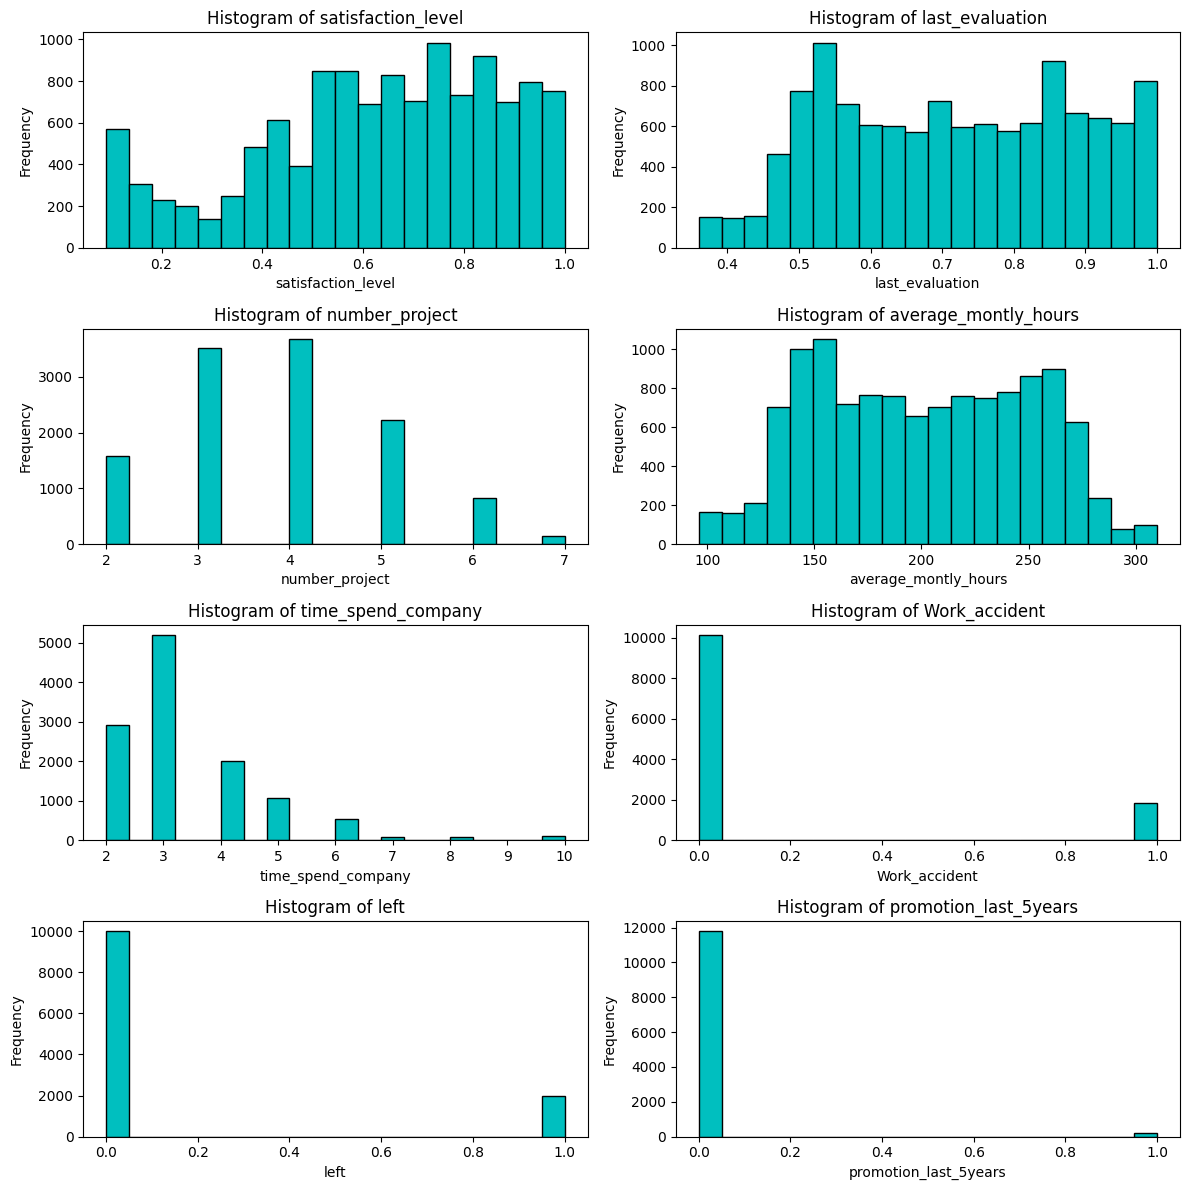

In [22]:
import matplotlib.pyplot as plt

df=data_cleaned

# Selecting only numerical columns for the plots
numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
                     'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']

fig, axs = plt.subplots(4, 2, figsize=(12, 12))
axs = axs.ravel()



for i, column in enumerate(numerical_columns):
    axs[i].hist(df[column], bins=20, color='c', edgecolor='black')
    axs[i].set_title(f"Histogram of {column}")
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


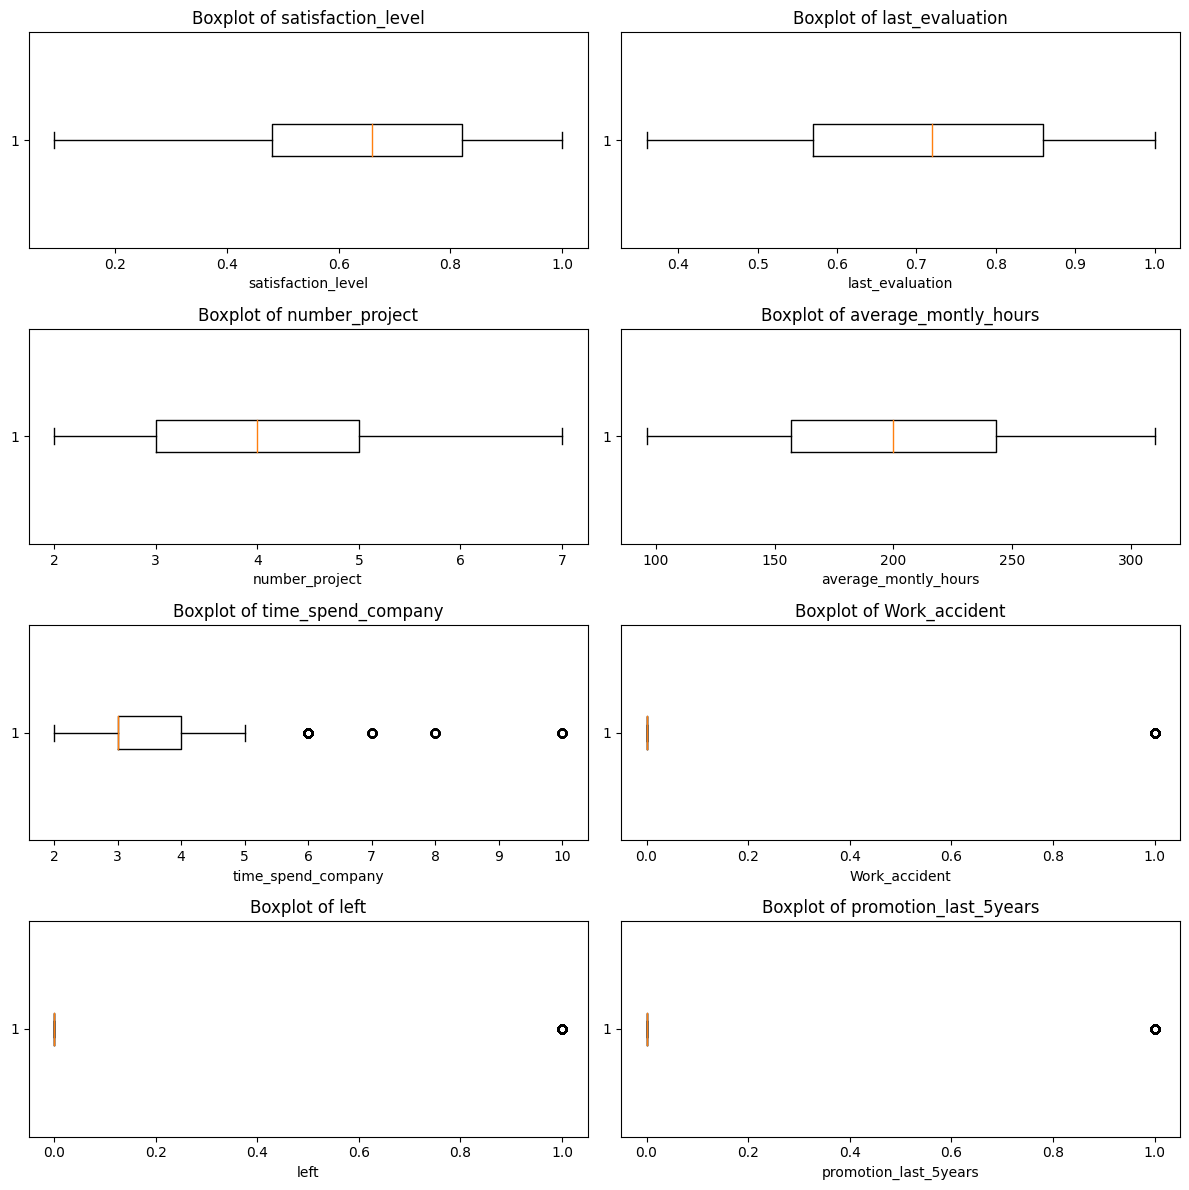

In [23]:
# Plot boxplots for each numerical feature
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
axs = axs.ravel()

for i, column in enumerate(numerical_columns):
    axs[i].boxplot(df[column], vert=False)
    axs[i].set_title(f"Boxplot of {column}")
    axs[i].set_xlabel(column)

plt.tight_layout()
plt.show()

# melihat corelation Matrix dengan variable Left

In [24]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


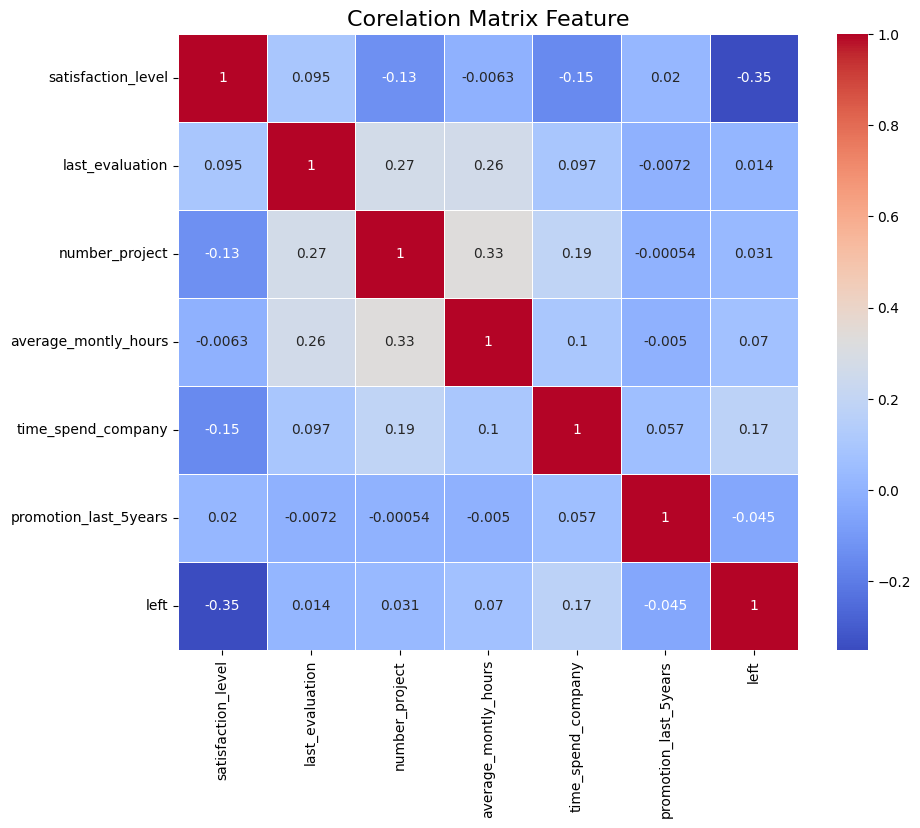

In [34]:
import seaborn as sns

# Calculating correlation between the specified variables
correlation_matrix=df[['satisfaction_level','last_evaluation', 'number_project','average_montly_hours','time_spend_company',
     'promotion_last_5years','left']].corr()


# Display the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Corelation Matrix Feature', fontsize=16)
plt.show()

# Making Model to Know about what kind to employers to choosed left from company


# model from sklearn

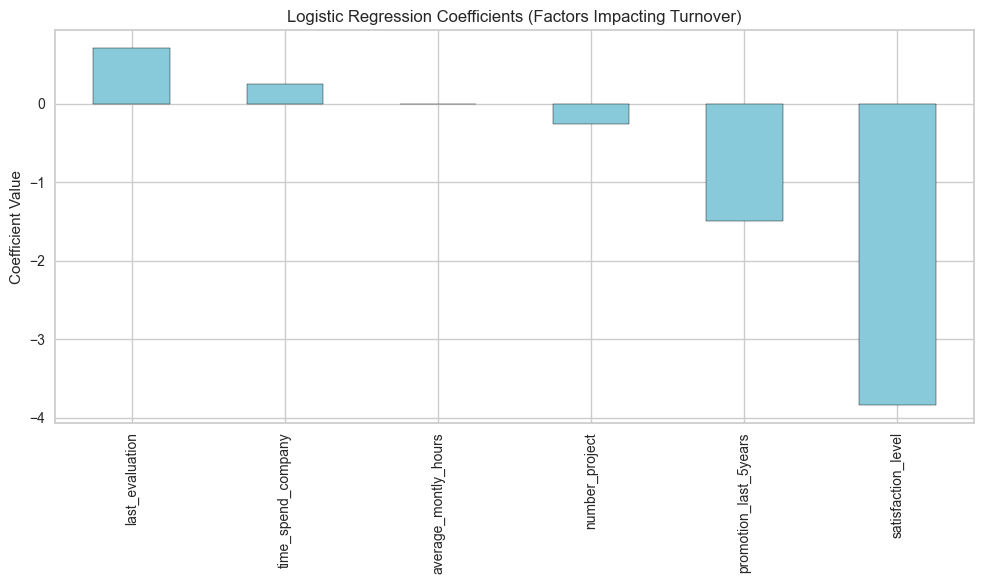

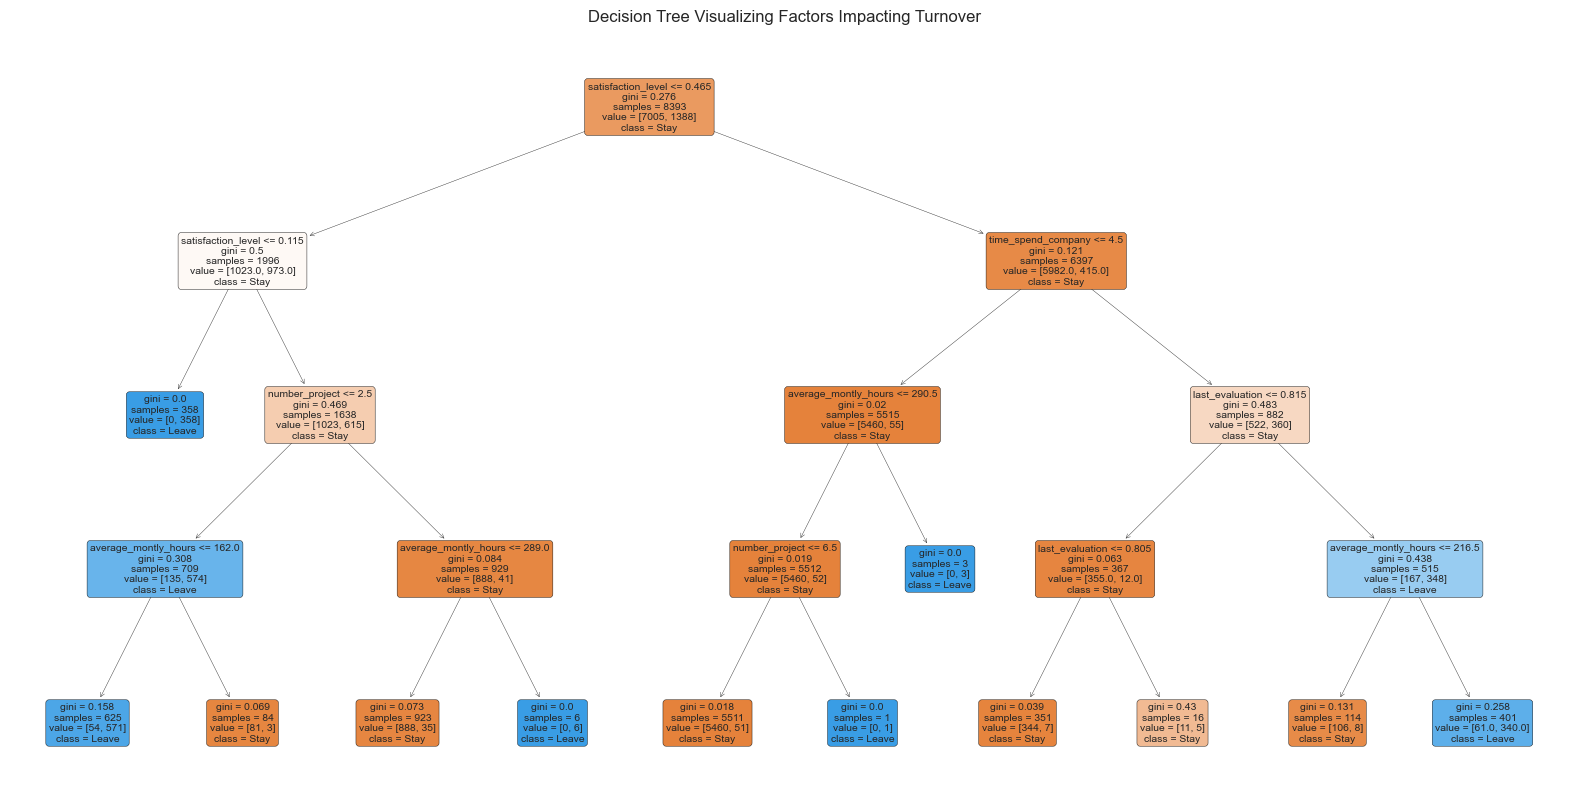

(0.830183435241801, 0.9677598665925514)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Preparing the data for logistic regression and decision tree
# Selecting relevant columns for the analysis
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
        'time_spend_company', 'promotion_last_5years']]
y = df['left']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Making predictions and calculating accuracy
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)

# Getting the coefficients from logistic regression
log_reg_coefficients = pd.Series(log_reg.coef_[0], index=X.columns).sort_values(ascending=False)

# Decision Tree Model
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=4)
decision_tree.fit(X_train, y_train)

# Making predictions with the decision tree
y_pred_tree = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, y_pred_tree)

# Plotting the feature importance for logistic regression
plt.figure(figsize=(10, 6))
log_reg_coefficients.plot(kind='bar', color='c', edgecolor='black')
plt.title('Logistic Regression Coefficients (Factors Impacting Turnover)')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

# Plotting the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, class_names=['Stay', 'Leave'], filled=True, rounded=True)
plt.title('Decision Tree Visualizing Factors Impacting Turnover')
plt.show()

# Outputting accuracy scores
log_reg_accuracy, decision_tree_accuracy


# model from pycaret 

In [39]:
#to Know from the classifcation its imblanace class or not

df_left1=df['left']==1
df_left0=df['left']==0

df_left1.sum(),df_left0.sum()

(1991, 10000)

In [43]:
from pycaret.classification import *
setup(data=df,
      target='left',
      train_size=0.8,
    fix_imbalance=True,
    session_id=123)

,Description,Value
0,Session id,123
1,Target,left
2,Target type,Binary
3,Original data shape,"(11991, 10)"
4,Transformed data shape,"(18397, 21)"
5,Transformed train set shape,"(15998, 21)"
6,Transformed test set shape,"(2399, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [45]:
from pycaret.classification import compare_models
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9835,0.9873,0.9240,0.9757,0.9490,0.9392,0.9398,0.8870
rf,Random Forest Classifier,0.9813,0.9816,0.9102,0.9760,0.9418,0.9307,0.9316,1.2320
et,Extra Trees Classifier,0.9753,0.9795,0.8901,0.9583,0.9228,0.9081,0.9091,1.6780
gbc,Gradient Boosting Classifier,0.9726,0.9859,0.9253,0.9115,0.9181,0.9017,0.9019,2.3840
dt,Decision Tree Classifier,0.9662,0.9461,0.9159,0.8851,0.9001,0.8798,0.8801,0.2760
ada,Ada Boost Classifier,0.9480,0.9776,0.8964,0.8107,0.8512,0.8198,0.8214,0.6830
knn,K Neighbors Classifier,0.8950,0.9440,0.9353,0.6235,0.7478,0.6850,0.7077,0.3020
qda,Quadratic Discriminant Analysis,0.8755,0.9153,0.8041,0.5950,0.6831,0.6080,0.6192,0.1540
dummy,Dummy Classifier,0.8339,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1830
lr,Logistic Regression,0.7781,0.8382,0.8261,0.4160,0.5531,0.4264,0.4709,1.9440


c:\Users\AXIOO\AppData\Local\Programs\Python\Python311\Lib\site-packages\pycaret\internal\pycaret_experiment\supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])


In [50]:
from pycaret.classification import create_model
modelLGBM=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9844,0.9910,0.9250,0.9801,0.9518,0.9425,0.9430
1,0.9854,0.9886,0.9375,0.9740,0.9554,0.9467,0.9469
2,0.9833,0.9873,0.9308,0.9673,0.9487,0.9388,0.9390
3,0.9864,0.9906,0.9434,0.9740,0.9585,0.9504,0.9505
4,0.9791,0.9805,0.8994,0.9728,0.9346,0.9223,0.9233
5,0.9844,0.9930,0.9371,0.9675,0.9521,0.9427,0.9429
6,0.9771,0.9904,0.9119,0.9477,0.9295,0.9158,0.9160
7,0.9864,0.9810,0.9308,0.9867,0.9579,0.9499,0.9504
8,0.9844,0.9860,0.9119,0.9932,0.9508,0.9415,0.9428


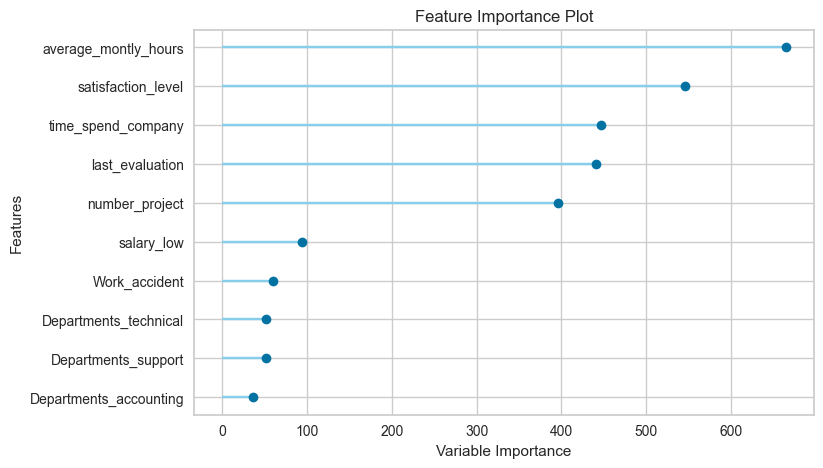

In [53]:
A

<Figure size 1000x600 with 0 Axes>

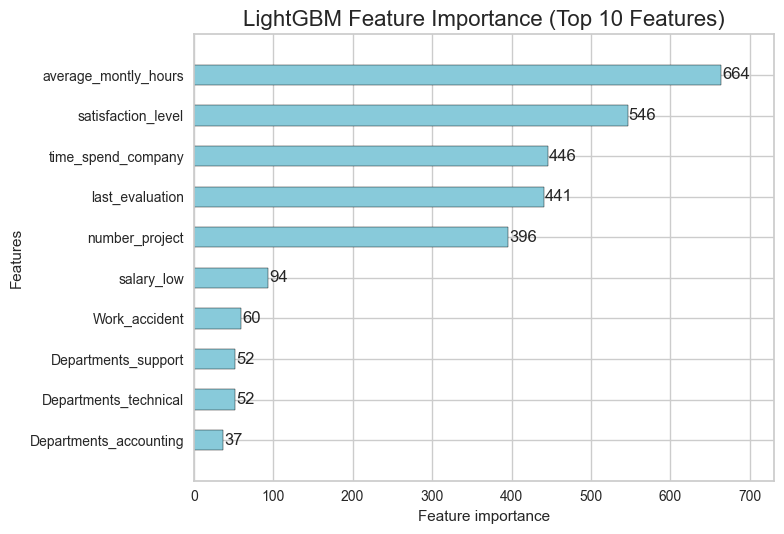

In [58]:
import matplotlib.pyplot as plt
import lightgbm as lgb

# Assuming you already trained the model using PyCaret
# Extract the booster from the trained PyCaret model
booster = modelLGBM.booster_

# Plot feature importance
plt.figure(figsize=(10, 6))
lgb.plot_importance(modelLGBM, max_num_features=10, importance_type='split', height=0.5, color='c', edgecolor='black')
plt.title('LightGBM Feature Importance (Top 10 Features)', fontsize=16)
plt.tight_layout()
plt.show()


In [64]:
df.head()
departmen=df['Departments'].unique()

In [65]:
departmen

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

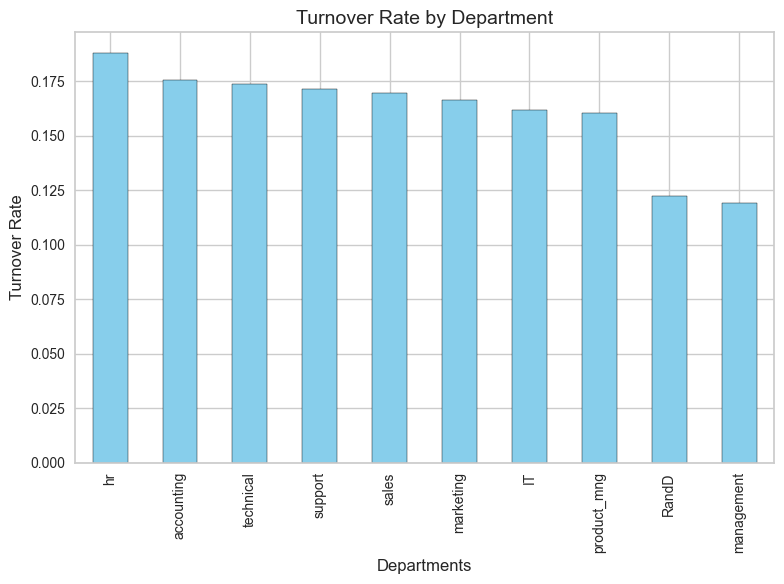

In [66]:
# 4. Segmentation Analysis
# Group data by departments and calculate turnover rate
turnover_by_department = df.groupby('Departments')['left'].mean().sort_values(ascending=False)

# Plotting the turnover rate by department
plt.figure(figsize=(8, 6))
turnover_by_department.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Turnover Rate by Department', fontsize=14)
plt.xlabel('Departments', fontsize=12)
plt.ylabel('Turnover Rate', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\AXIOO\AppData\Local\Temp\ipykernel_16596\3027078180.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='left', y='satisfaction_level', data=df, palette='viridis')
C:\Users\AXIOO\AppData\Local\Temp\ipykernel_16596\3027078180.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='left', y='average_montly_hours', data=df, palette='viridis')


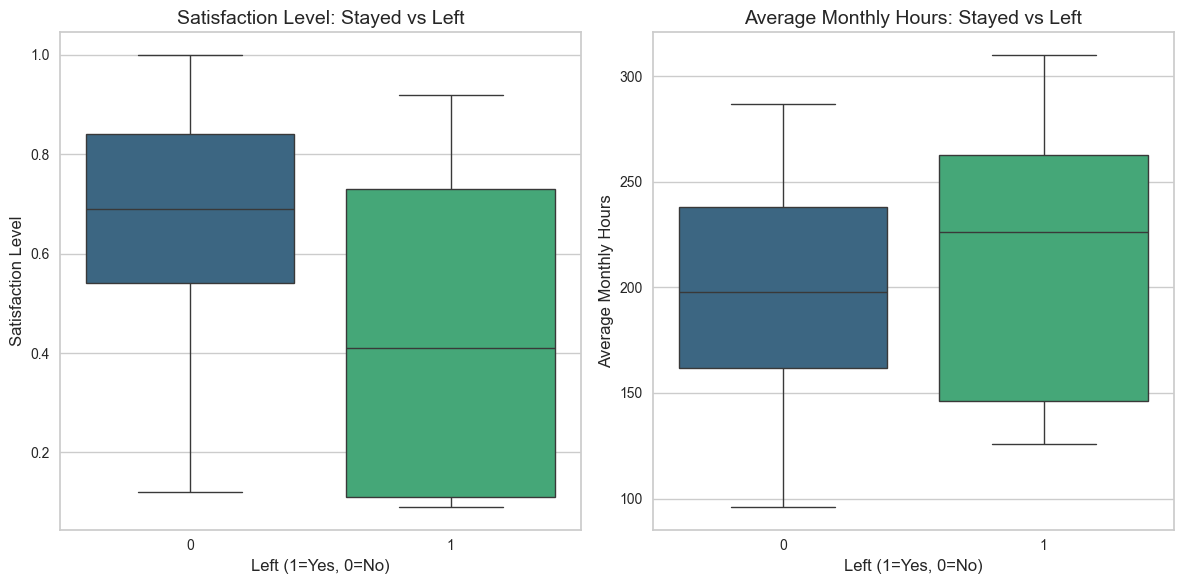

In [69]:
# Boxplot comparison for Satisfaction Level
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='left', y='satisfaction_level', data=df, palette='viridis')
plt.title('Satisfaction Level: Stayed vs Left', fontsize=14)
plt.xlabel('Left (1=Yes, 0=No)', fontsize=12)
plt.ylabel('Satisfaction Level', fontsize=12)

# Boxplot comparison for Average Monthly Hours
plt.subplot(1, 2, 2)
sns.boxplot(x='left', y='average_montly_hours', data=df, palette='viridis')
plt.title('Average Monthly Hours: Stayed vs Left', fontsize=14)
plt.xlabel('Left (1=Yes, 0=No)', fontsize=12)
plt.ylabel('Average Monthly Hours', fontsize=12)

plt.tight_layout()
plt.show()


Penjelasan Boxplot 1: Satisfaction Level (Tingkat Kepuasan)

Kiri: Karyawan yang tetap tinggal (left = 0) memiliki tingkat kepuasan yang lebih tinggi secara keseluruhan dibandingkan dengan karyawan yang keluar (left = 1).

Distribusi: Median tingkat kepuasan untuk karyawan yang tetap adalah sekitar 0.7, sementara median kepuasan karyawan yang keluar adalah 0.4.

Kesimpulan: Karyawan yang merasa tidak puas cenderung lebih banyak yang keluar dari perusahaan. Ini menunjukkan bahwa kepuasan karyawan memainkan peran penting dalam retensi karyawan.

Penjelasan Boxplot 2: Average Monthly Hours (Rata-rata Jam Kerja Bulanan)

Kanan: Karyawan yang keluar dari perusahaan (left = 1) memiliki jam kerja bulanan yang lebih tinggi dibandingkan dengan yang tetap tinggal (left = 0).

Distribusi: Median jam kerja bulanan untuk karyawan yang keluar adalah sekitar 225 jam, sementara median untuk yang tetap adalah 200 jam.

Kesimpulan: Karyawan yang bekerja lebih banyak jam setiap bulannya cenderung lebih rentan untuk keluar. Ini mungkin menunjukkan burnout atau ketidakseimbangan antara pekerjaan dan kehidupan pribadi sebagai faktor penyebab turnover.

this is data about HR to retention of employers 

Goal:
HR ingin membuat program retensi karyawan.

Task:
Analisis, hipotesis, dan pembuatan cerita data terkait alasan karyawan meninggalkan perusahaan (churn).


Data:
Sekitar 15.000 catatan karyawan.
Questions from Management:

1Apa penyebab utama turnover?

2Apakah ada hal yang mengejutkan dalam data?

3Segmen mana yang harus kita fokuskan?

4Departemen mana yang memiliki turnover tertinggi?

5Apakah kita perlu meningkatkan X atau menurunkan X?

6Di mana kita harus menerapkan program pilot?

Dari data yang kamu sediakan tentang program retensi karyawan, di sini adalah jawaban dan analisis berdasarkan pertanyaan dari manajemen dan plot feature importance yang telah kamu tunjukkan:

Apa penyebab utama turnover?

Berdasarkan feature importance dari model LightGBM, faktor yang paling berpengaruh terhadap turnover karyawan adalah average_monthly_hours. Artinya, karyawan dengan jam kerja bulanan yang tinggi cenderung memiliki risiko lebih besar untuk keluar dari perusahaan. Hal ini mungkin menunjukkan bahwa karyawan yang bekerja terlalu banyak jam merasa burnout, sehingga meninggalkan perusahaan.
Apakah ada hal yang mengejutkan dalam data?

Hal yang menarik adalah satisfaction_level juga merupakan faktor penting setelah average_monthly_hours. Ini menunjukkan bahwa tingkat kepuasan karyawan berperan besar dalam turnover, tetapi jam kerja tampaknya lebih berpengaruh dibanding kepuasan. Ini bisa menjadi insight yang tidak diduga, karena biasanya tingkat kepuasan sering dianggap faktor utama, tapi dalam kasus ini, jumlah jam kerja lebih menonjol.
Segmen mana yang harus kita fokuskan?

Berdasarkan data feature importance, karyawan dengan jumlah jam kerja tinggi dan kepuasan kerja rendah harus menjadi fokus utama. Selain itu, masa kerja di perusahaan (time_spend_company) dan penilaian kinerja terakhir (last_evaluation) juga merupakan variabel yang penting, sehingga karyawan dengan evaluasi rendah atau yang sudah bekerja cukup lama perlu diperhatikan.
Departemen mana yang memiliki turnover tertinggi?

Data importance menunjukkan beberapa departemen seperti Departments_technical, Department HR, dan Departments_accounting memiliki pengaruh pada model. Meskipun pengaruh mereka tidak setinggi variabel lain, ini dapat memberi petunjuk bahwa ada departemen yang mungkin lebih rentan terhadap turnover. Kamu bisa memeriksa lebih lanjut dengan analisis departemen mana yang memiliki turnover tertinggi secara spesifik.
Apakah kita perlu meningkatkan X atau menurunkan X?

Berdasarkan feature importance, sebaiknya fokus pada mengurangi jam kerja (average_monthly_hours) karyawan atau menurunkan jumlah proyek yang ditugaskan (number_project). Ini karena variabel-variabel ini tampaknya berhubungan erat dengan churn. Selain itu, upaya untuk meningkatkan tingkat kepuasan (satisfaction_level) karyawan dapat membantu menurunkan turnover.
Di mana kita harus menerapkan program pilot?

Program pilot sebaiknya diterapkan pada departemen dengan tingkat turnover yang tinggi dan karyawan yang memiliki jam kerja berlebihan dan kepuasan rendah. Berdasarkan feature importance, kamu bisa mulai dengan departemen yang terkait dengan 'technical', HR', dan 'accounting', karena mereka masuk dalam 10 besar faktor penting.
Kesimpulan:
Fokus utama: Mengurangi jam kerja karyawan dan meningkatkan kepuasan kerja.
Segmen karyawan: Karyawan dengan jam kerja tinggi, penilaian kinerja terakhir yang rendah, dan yang sudah lama bekerja.
Departemen target: Technical, HR, dan accounting untuk pilot program retensi.